In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

### Load the dataset

In [3]:
os.chdir("C:\\Users\\Admin\\Desktop\\Training\\DSP31\\Python\\PCA")

In [4]:
df_house_price = pd.read_csv('house_price.csv')

In [5]:
df_house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###  Exploratory Data Analysis

In [7]:
len(df_house_price.columns)

80

In [8]:
df_house_price.shape

(1460, 80)

df_house_price has 80 columns (79 features + id and target SalePrice) and 1460 entries (number of rows or house sales)

In [9]:
numerical_var = df_house_price.dtypes[df_house_price.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_var))

categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"]
print("Number of Categorical features: ", len(categorical_var))

Number of Numerical features:  37
Number of Categorical features:  43


The main check points would be the correlation between the numeric variables and target variable with multicollinearity.

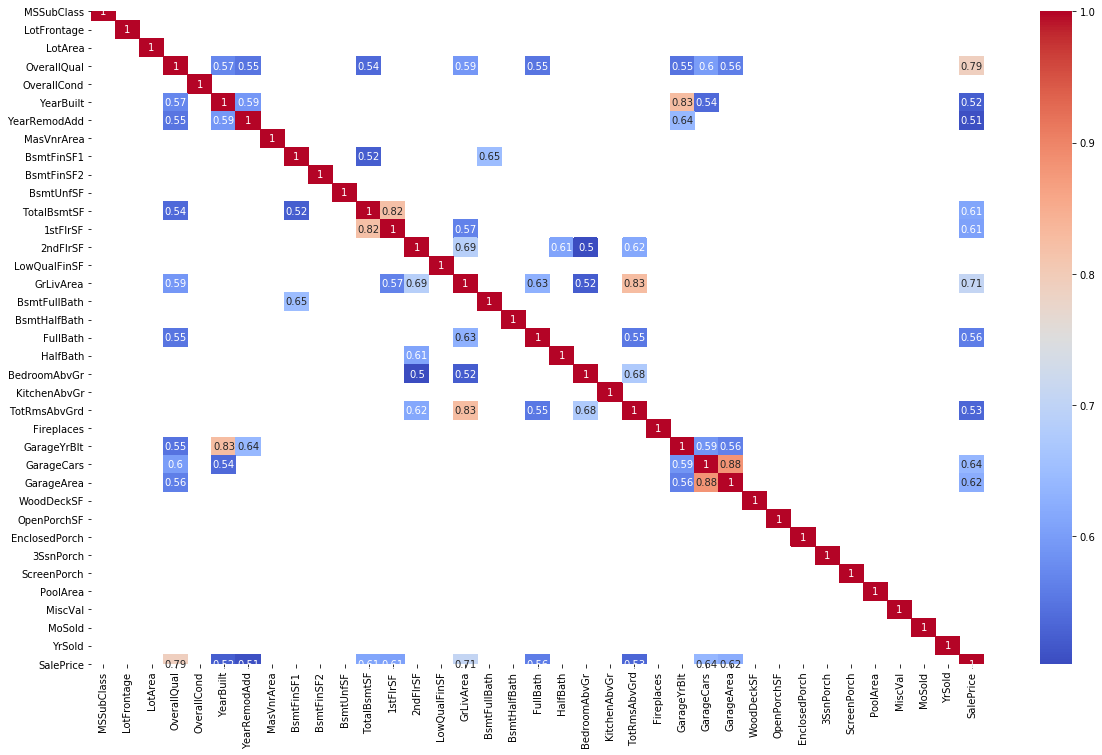

In [10]:
#filter numeric column only 
data_num = df_house_price[numerical_var]

#calculating correlation among numeric variable 
corr_matrix = data_num.corr() 

#filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5]

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap='coolwarm',
            annot=True);

Based on the above correlation matrix, correlation among the variables been observed. For example, 
"SalePrice" are correlated with "OverallQual" , "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", and "GarageArea". 

It also show the multicollinearity. For example: the correlation between GarageCars and GarageArea is very high (0.88)



### SalePrice


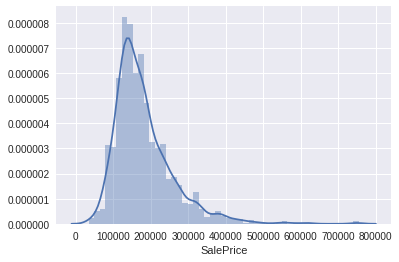

In [9]:
sns.distplot(df_house_price['SalePrice'])

From the above result, We can notice that values of "SalePrice" are not a normal distribution. It is positively skewed.

A Few people have very expensive house

### Relationship with numerical variables


### Overall Quality

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


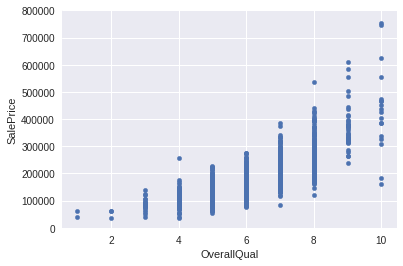

In [10]:
#scatter plot OverallQual/saleprice
data = pd.concat([df_house_price["SalePrice"], df_house_price["OverallQual"]],axis=1)
data.plot.scatter(x="OverallQual", y="SalePrice", ylim=(0,800000));

From the above result, We can say that the price of the house will be when the overall quality of the house is high. We can notice that for the same quality different price. Why?.
"SalePrice" is correlated with other variables and "OverallQual" might be correlated with other variables. 

### Year Built


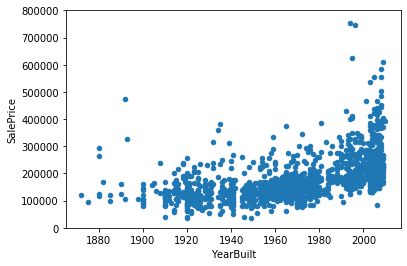

In [11]:
#scatter plot YearBuilt/saleprice
data = pd.concat([df_house_price["SalePrice"], df_house_price["YearBuilt"]],axis=1)
data.plot.scatter(x="YearBuilt", y="SalePrice", ylim=(0,800000));


From the above plot, we can observe that the price of a house is comparatively more than the house was built recently. We also can notice that there are some outlier which means even if the house is too old, the price of the house is moderately high due to influences of other variables.

### Ground Living Area

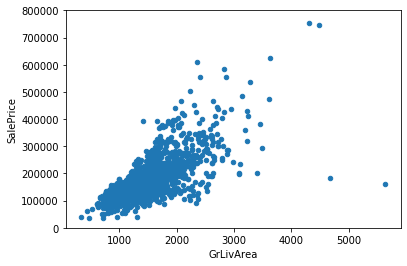

In [12]:
#scatter plot grlivarea/saleprice
data = pd.concat([df_house_price["SalePrice"], df_house_price["GrLivArea"]],axis=1)
data.plot.scatter(x="GrLivArea", y="SalePrice", ylim=(0,800000));

While the size of the ground living area is increasing, the price of the houses is increasing. But
even if the ground living area is high, the price of the house is low and when the ground living area is high, the price of the house is too high. Why?. 

We know the influence of other variables affects the price change of house.

When "GrLivArea" of a house is highly correlated with other variables, the price of the house is increasing and when "GrLivArea" of a house is not highly correlated with other variables, the price of the house is decreasing.

### TotalBsmtSF

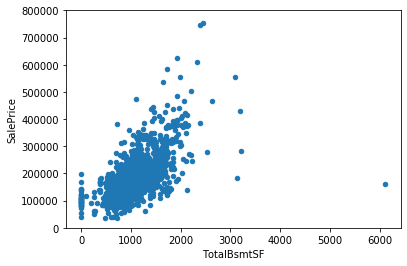

In [13]:
data = pd.concat([df_house_price["SalePrice"],df_house_price["TotalBsmtSF"]], axis=1)
data.plot.scatter(x="TotalBsmtSF", y="SalePrice", ylim=(0,800000));

We can notice that "SalePrice" and "TotalBsmtSF" is with a linear relationship. We can see the value of "SalePrice" is going straight when the value of "TotalBsmtSF" is 0. Total square feet of basement area of a house is high but the price of the house is low due to the influence of other variables.


### Visualizing categorical variables with "SalePrice".


### House Style

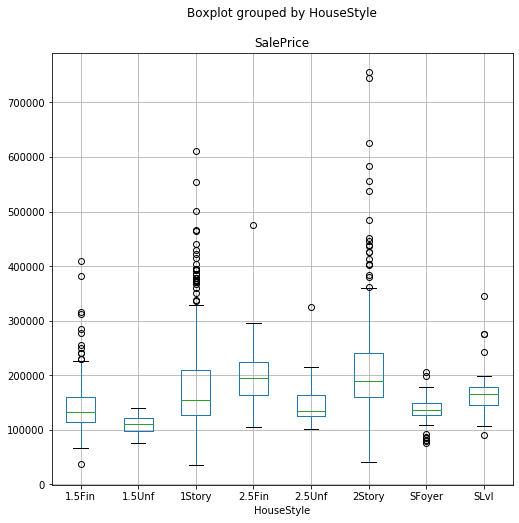

In [14]:
df_house_price.boxplot(column="SalePrice",        # Column to plot
                 by= "HouseStyle",         # Column to split upon
                 figsize= (8,8))

### Foundation

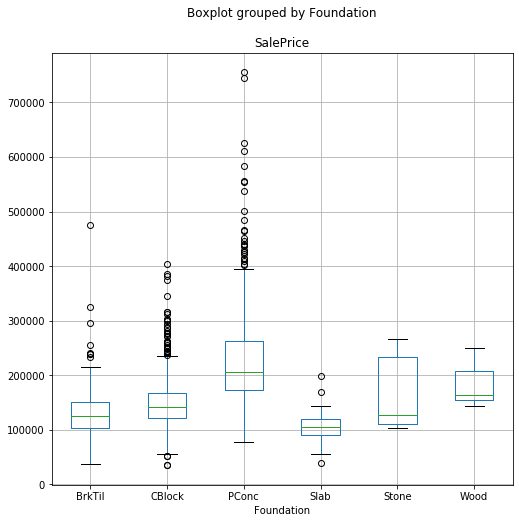

In [15]:
df_house_price.boxplot(column="SalePrice",        # Column to plot
                 by= "Foundation",         # Column to split upon
                 figsize= (8,8))

From the above plot, we can observe that if a house has "Poured Concrete" foundation, the price of the house is higher than other house prices.

### Garage Quality

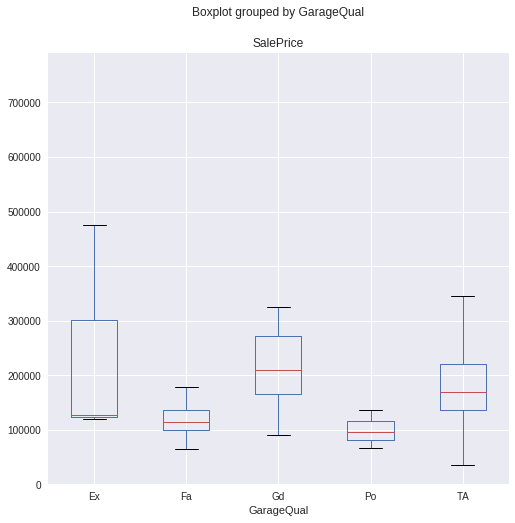

In [16]:

df_house_price.boxplot(column="SalePrice",        # Column to plot
                 by= "GarageQual",         # Column to split upon
                 figsize= (8,8))

From the above plot, we can observe that if a house has a good garage, the price of the house is higher than other house prices. Some houses have an excellent garage. So the price of this kind of house is higher than all.

So far, we have compared some variables with the target variable. We observed that what is the variables impact on target variable based EDA. If we want to reduce dimension, we can take only impact variables. This is one kind of way. Now we will use PCA to reduce the dimension of this dataset.

### Before apply PCA we have to handle missing value.

In [16]:
#missing data
total_missing_value = df_house_price.isnull().sum().sort_values(ascending=False)
percent_of_missign_value = (df_house_price.isnull().sum()/df_house_price.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing_value, percent_of_missign_value], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


From above plot, We can see that which variable is correlated with "SalePrice".

### Imputing missing values

PooQC: Data description says NA means "No Pool". In this data set, it has huge ratio of missing value(99%) and majority of houses have no Pool at all in general.

In [17]:
df_house_price["PoolQC"] = df_house_price["PoolQC"].fillna("None")

### MiscFeature

Data description says NA means "no misc feature"

In [19]:
df_house_price["MiscFeature"] = df_house_price["MiscFeature"].fillna("None")

### Alley

Data description says NA means "no alley access"

In [20]:
df_house_price["Alley"] = df_house_price["Alley"].fillna("None")

### Fence

This column has NA value means "no fence"

In [23]:
df_house_price["Fence"] = df_house_price["Fence"].fillna("None")

### FireplaceQu

This column has NA means "no fireplace"

In [24]:
df_house_price["FireplaceQu"] = df_house_price["FireplaceQu"].fillna("None")

### LotFrontage

The area of each street connected to the house property most likely have a similar area to other houses in its neighborhood. So we can fill in missing values by the median LotFrontage of the neighborhood.

In [25]:
df_house_price["LotFrontage"] = df_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

### GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None


In [26]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_house_price[i] = df_house_price[i].fillna('None')

### GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [27]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_house_price[i] = df_house_price[i].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement

for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_house_price[i] = df_house_price[i].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.

In [28]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_house_price[i] = df_house_price[i].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [29]:
df_house_price["MasVnrType"] = df_house_price["MasVnrType"].fillna("None")
df_house_price["MasVnrArea"] = df_house_price["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [30]:
df_house_price['MSZoning'] = df_house_price['MSZoning'].fillna(df_house_price['MSZoning'].mode()[0])


Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.


In [31]:
df_house_price = df_house_price.drop(['Utilities'], axis=1)


Functional : data description says NA means typical

In [32]:
df_house_price["Functional"] = df_house_price["Functional"].fillna("Typ")

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value

In [33]:
df_house_price['Electrical'] = df_house_price['Electrical'].fillna(df_house_price['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [34]:
df_house_price['KitchenQual'] = df_house_price['KitchenQual'].fillna(df_house_price['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [36]:
df_house_price['Exterior1st'] = df_house_price['Exterior1st'].fillna(df_house_price['Exterior1st'].mode()[0])
df_house_price['Exterior2nd'] = df_house_price['Exterior2nd'].fillna(df_house_price['Exterior2nd'].mode()[0])

SaleType : Fill in again with most frequent which is "WD"

In [37]:
df_house_price['SaleType'] = df_house_price['SaleType'].fillna(df_house_price['SaleType'].mode()[0])

MSSubClass : Na most likely means No building class. We can replace missing values with None

In [38]:
df_house_price['MSSubClass'] = df_house_price['MSSubClass'].fillna("None")

In [39]:
categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"]

Transforming some numerical variables that are really categorical

In [40]:
df_house_price['OverallCond'].dtype

dtype('int64')

If we take the variable "OverallCond" which represents rates the overall condition of the house. So value of this column is from 1 to 10.

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
       
The datatype of this column is in "int64", but it should be in categorical. 

So we handle like this column.

In [42]:
#Changing OverallCond into a categorical variable
df_house_price['OverallCond'] = df_house_price['OverallCond'].astype(str)

In [43]:
#MSSubClass=The building class
df_house_price['MSSubClass'] = df_house_price['MSSubClass'].apply(str)

In [44]:
#Year and month sold are transformed into categorical features.
df_house_price['YrSold'] = df_house_price['YrSold'].astype(str)
df_house_price['MoSold'] = df_house_price['MoSold'].astype(str)

Label Encoding some categorical variables that may contain information in their ordering set

In [45]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [46]:
# process columns, apply LabelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder() 
    label_ec.fit(list(df_house_price[c].values)) 
    df_house_price[c] = label_ec.transform(list(df_house_price[c].values))


In [47]:
df_house_price = pd.get_dummies(df_house_price)
print(df_house_price.shape)

(1460, 221)


In [48]:
df_house_price.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9,65.0,8450,1,1,3,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,4,80.0,9600,1,1,3,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,9,68.0,11250,1,1,0,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,10,60.0,9550,1,1,0,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,9,84.0,14260,1,1,0,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0


Remove target variable

In [49]:
X = df_house_price.drop('SalePrice',axis=1)  


### Standardizing input variables

In [50]:
from sklearn.preprocessing import StandardScaler  
import numpy as np

# standardized the dataset
sc_x = StandardScaler()    
X_std = sc_x.fit_transform(X)

#PCA from scratch using python

### 1. Computing the mean vector
find the mean for each column

In [51]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)

### 2. Computing the Covariance Matrix
find the covariance among variables


In [52]:
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0006854   0.23801249  0.09265759 ...  0.02782127  0.02428959
  -0.09045685]
 [ 0.23801249  1.0006854   0.33618773 ...  0.01367554 -0.07309658
   0.12098879]
 [ 0.09265759  0.33618773  1.0006854  ... -0.01078847  0.0057153
   0.02265091]
 ...
 [ 0.02782127  0.01367554 -0.01078847 ...  1.0006854  -0.25217909
  -0.03608658]
 [ 0.02428959 -0.07309658  0.0057153  ... -0.25217909  1.0006854
  -0.6547714 ]
 [-0.09045685  0.12098879  0.02265091 ... -0.03608658 -0.6547714
   1.0006854 ]]


### 3. Computing eigenvectors and corresponding eigenvalues
find eigenvalues and eigenvectors


In [53]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.02578360e-02+0.j  5.42189410e-02+0.j -2.46394969e-01+0.j ...
   1.69438597e-15+0.j  1.07446555e-14+0.j  1.22338363e-14+0.j]
 [ 8.56968362e-02+0.j -7.81831120e-02+0.j -1.90661983e-01+0.j ...
  -1.33402190e-15+0.j -3.22805904e-15+0.j -4.00965914e-15+0.j]
 [ 4.33834127e-02+0.j -9.31938282e-02+0.j -1.59697672e-01+0.j ...
  -1.12257022e-15+0.j -1.91383667e-15+0.j -1.97183498e-15+0.j]
 ...
 [-8.56963601e-03+0.j -5.35441802e-03+0.j -1.05793755e-02+0.j ...
  -1.77468305e-02+0.j -7.72849629e-03+0.j -1.79915445e-02+0.j]
 [-6.10228262e-02+0.j -7.54550046e-02+0.j -2.87315810e-02+0.j ...
  -5.85873172e-02+0.j -2.55139567e-02+0.j -5.93951877e-02+0.j]
 [ 1.23238381e-01+0.j  1.08605042e-01+0.j  5.82208744e-02+0.j ...
  -4.27189133e-02+0.j -1.86034888e-02+0.j -4.33079716e-02+0.j]]

Eigenvalues 
[ 1.43545569e+01+0.00000000e+00j  6.99621515e+00+0.00000000e+00j
  6.20663538e+00+0.00000000e+00j  5.05060151e+00+0.00000000e+00j
  3.91488229e+00+0.00000000e+00j  3.73861775e+00+0.00000000e+0

If eigen value is high for eigen vector that means the vector has a lot of variance. 

### 4. Sorting the eigenvectors by decreasing eigenvalues

In [63]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [[np.abs(eig_vals[i]), eig_vecs[:,i]] for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
eig_valu=[]
for i in eig_pairs:
    eig_valu.append(i[0])
    print(i[0])

Eigenvalues in descending order:
14.354556892293935
6.996215148464507
6.20663538215704
5.050601511388265
3.9148822941940518
3.738617749913083
3.653700748964841
3.3214449160614734
3.2326016851646404
3.0304020176182327
2.830110167633534
2.7266988761934274
2.6528560769079506
2.582822053609462
2.5437649554442157
2.412572464650366
2.336833654970308
2.3319265353354455
2.2362699641913246
2.1872445838917676
2.1675558713066616
2.1111484839264696
2.0763345309603363
2.017509052261763
1.9975662405360377
1.9241533665963728
1.9190597040322495
1.9112621264723697
1.8890967153605305
1.866433012357598
1.7946351846919304
1.7721023702155196
1.7375332104299999
1.7226623834575707
1.6855259583798943
1.6419486912100205
1.5997627908956453
1.5787481636945795
1.550605074789844
1.5333536496060316
1.5129051744409179
1.4852147640064803
1.470173900049125
1.4507647455154924
1.430105182168161
1.420389670377835
1.4076515484018843
1.3974164949097918
1.3667581957082062
1.3607406402064057
1.3381084706303217
1.316311692241

All the eigen values are sorted in an ascending order.

### 5. Select components based on eigen values

We have 221 components from which we have to select components based on engen value which has high value.

Here, filter out eigen values which has above 0.5

In [72]:
pairs = np.array(eig_pairs)
count = 0
components = []
for i in range(len(eig_pairs)):
  if eig_pairs[i][0] >= 1:
    count += 1
    components.append(pairs[i])
    
print("Number of components: " + str(count))

  

Number of components: 80


When we select eigen value as 0.5 or above 0.5, we get 138 components.
0.5 is not a threshold eigen value. We use this value to check the percentage of information the selected component carry. if the selected component gives less information, we select more components and this can be achieved by setting eigen value below 0.5.

Let's check how much information the selected components contains.

In [68]:
pd.DataFrame(eig_valu).to_csv("eignval.csv")

In [73]:
# calculate Explained Variance
total = 0
ein = []
for i in range(len(components)):
  total += components[i][0]
  ein.append(components[i][0])
  
#divide eigen value by total eigen value and then multiple with 100 for the selected components   
var_exp = [(i / sum(eig_vals))*100 for i in sorted(ein, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


In [70]:
eig_var=pd.DataFrame(cum_var_exp, columns=["Var"])

In [71]:
eig_var.to_csv("eig_var1.csv")

We can notice that 138 components has 93.5% information among all components.

When we select 138 components we lose 6.5% information.

### 6. Select components based on scree plot

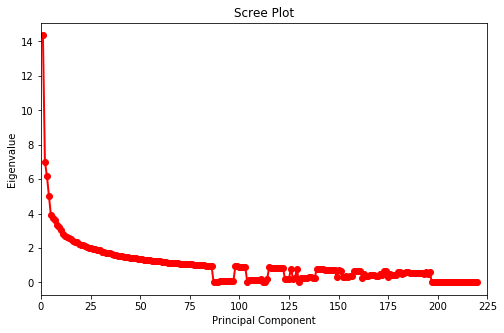

In [74]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = len(eig_vals)
num_obs = 9

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.xlim(0,225)                
plt.show()

Scree Plot shows eigen value for each component.
starting components has high value and in middle , some componenet has higher than others.
What can we do using scree plot?
We can select components based scree plot. If we select 150 components based on scree plot, We have to check how much information has the selected components.

The following plot to shows percentage of variance explained by each of the selected components.

In [75]:
# calculate Explained Variance
total = sum(eig_vals)
#divide eigen value by total eigen value and then multiple with 100 for the selected components   
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


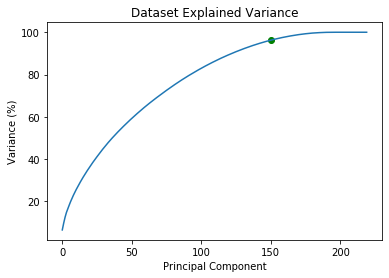

In [76]:
plt.figure()
plt.scatter([150],[cum_var_exp[150]],color='g')
plt.plot(cum_var_exp)
plt.xlabel('Principal Component')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

From the above plot, we can observe that the variance remains constant after the number of components reaches 150

In [77]:
cum_var_exp[150]

(96.24685516598804+0j)

From the above result, we can see that the selected 150 components has 96% information. Here we lose 4% information. We have to select less component than original variable, at the same time, the selected component must contain as much as information. 

### 7. Deriving the new data set

Finally, we select only 150 components.
Filter out eigen vector of the selected components.

In [78]:
N = 221
M = 150

a = np.ndarray(shape = (N, 0))
for i in range(M):
    b = eig_pairs[i][1].reshape(N,1)
    a = np.hstack((a, b))

ValueError: cannot reshape array of size 220 into shape (221,1)

Perform matrix calculation of original dataset with eigen vector of the selected components.

In [0]:
# Projection Onto the New Feature Space
Y = X_std.dot(a)

In [60]:
Y.shape

(1460, 150)

We reduced the number of columns from 221 to 150.

In [61]:
Y

array([[ 3.15172011, -1.21878173, -0.34350202, ..., -0.05412658,
         0.07858162, -0.14685771],
       [-0.40369184,  2.94273142, -0.37119922, ..., -0.29748698,
        -0.9795956 ,  0.02092249],
       [ 3.45984419, -0.84736524, -0.09569296, ...,  0.21419079,
         0.2568009 ,  0.14140836],
       ...,
       [ 0.24086792, -1.7220848 ,  3.21917314, ..., -1.0885956 ,
        -1.9170509 ,  0.6719719 ],
       [-3.0151936 ,  3.09806924, -1.58955202, ...,  0.59981306,
         0.03426459,  0.22867934],
       [-0.92426149,  3.52702079, -0.87559633, ...,  0.61270902,
        -0.08401412,  0.81225212]])

# PCA using sklearn

### Loading PCA module from sklearn
loading pca module from sklearn


In [79]:
from sklearn.decomposition import PCA as sklearnPCA

We have 221 columns. So first we choose 221 components

In [80]:
# create instance for pca
sklearn_pca = sklearnPCA(n_components=80)

# fit and transform the instance on datad
Y_sklearn = sklearn_pca.fit_transform(X_std)


In [81]:
print(sklearn_pca.explained_variance_ratio_)

[0.0652033  0.0317792  0.02819265 0.02294155 0.0177827  0.01698204
 0.01659632 0.015087   0.01468343 0.013765   0.01285519 0.01238543
 0.01204979 0.01173158 0.01155386 0.01095803 0.01061383 0.01059165
 0.01015704 0.00993259 0.00984291 0.00958659 0.00942953 0.00916228
 0.0090701  0.00873044 0.00871078 0.00867608 0.00857782 0.00847395
 0.00814033 0.00804518 0.0078832  0.00781262 0.00764527 0.00743803
 0.00725522 0.00713498 0.00701361 0.00695233 0.00684964 0.00671936
 0.0066373  0.00657174 0.00648117 0.0064272  0.00634319 0.00632209
 0.00619124 0.00613453 0.00599885 0.00595425 0.00586907 0.00584976
 0.00572977 0.00571496 0.00563661 0.00559871 0.00553462 0.00546937
 0.00540073 0.00526421 0.00521851 0.00509953 0.00505823 0.00501913
 0.00495181 0.00491435 0.00487276 0.0047721  0.00473588 0.00471063
 0.00468055 0.00461812 0.00457688 0.00448333 0.00445971 0.00444516
 0.00442709 0.00438423]


Percentage of variance explained by each of the selected components.


### Select components based on singular value instead of eigen value as we saw before.

In [82]:

sklearn_pca.singular_values_

array([144.71799648, 101.03206337,  95.16028825,  85.8418711 ,
        75.57647562,  73.85546715,  73.01191148,  69.61281966,
        68.67544388,  66.49300329,  64.2579841 ,  63.07298599,
        62.21248143,  61.38553924,  60.91879507,  59.32723333,
        58.38802916,  58.32699326,  57.11779563,  56.48316053,
        56.227592  ,  55.49065709,  55.03421696,  54.24872865,
        53.97513657,  52.95487168,  52.8951924 ,  52.78975125,
        52.48995627,  52.17119572,  51.13388616,  50.83417561,
        50.31981526,  50.09404608,  49.55463589,  48.87836115,
        48.27396108,  47.87229436,  47.46336363,  47.25555933,
        46.90527167,  46.45706207,  46.17252217,  45.94390828,
        45.62620439,  45.43586708,  45.1379417 ,  45.06279717,
        44.59401769,  44.38930882,  43.89568178,  43.73220261,
        43.41826944,  43.34676443,  42.8999222 ,  42.84442407,
        42.54971203,  42.40642044,  42.1630016 ,  41.91374738,
        41.64989332,  41.12011578,  40.94123958,  40.47

In [84]:
count = 0
for i in range(len(sklearn_pca.singular_values_)):
    if sklearn_pca.singular_values_[i]>= 22.5:
        count += 1

print("Number of components: " + str(count))

Number of components: 80


When we select singular value as 22.5 , we get 138 components.
We use this value to check the percentage of information the selected component carry. If the selected component gives less information, we select more components and this can be achieved by setting singular value below 22.5.

In [86]:
cum_sum = np.cumsum(sklearn_pca.explained_variance_ratio_)
cum_sum[79]


0.7395498256976253

155 components has 96.9% of information about dataset.

### Select components based on Scree Plot

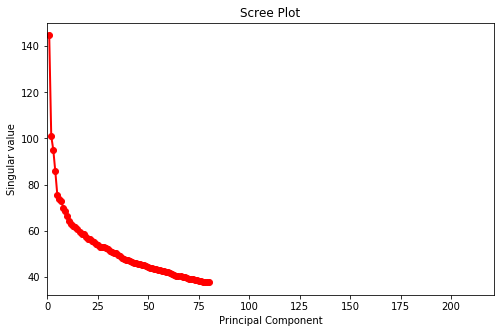

In [87]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = len(sklearn_pca.singular_values_)
num_obs = 9

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals,sklearn_pca.singular_values_, 'ro-', linewidth=2)
 
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular value')
plt.xlim(0,221)                
plt.show()

Scree Plot shows singular value for each component.
starting components has high value.
What can we do using scree plot? 

From the above plot, we can observe that 150 components has singular value above 22.5

We can select components based on scree plot. If we select 150 components based on scree plot, we have to check how much information does the selected components has.

The following plot shows percentage of variance explained by each of the selected components.

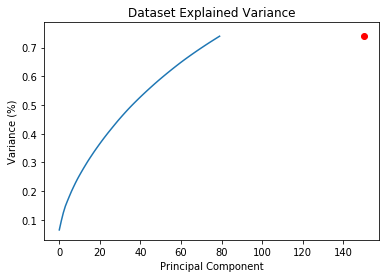

In [89]:
plt.figure()
cum_sum = np.cumsum(sklearn_pca.explained_variance_ratio_)
plt.scatter([150],[cum_sum[79]],color='r')
plt.plot(np.cumsum(sklearn_pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

From the above plot, we can observe that the variance remains constant after the number of components reaches 150


In [90]:
cum_sum = np.cumsum(sklearn_pca.explained_variance_ratio_)
cum_sum[79]

0.7395498256976253

150 components has 96% information about the dataset.

Finaly we select 150 components 

In [92]:
# create instance for pca
sklearn_pca = sklearnPCA(n_components=80)
# fit and transform the instance on datad
Y_sklearn = sklearn_pca.fit_transform(X_std)

### Print the new dataset

In [93]:
Y_sklearn

array([[ 3.14959506, -1.21443552, -0.33863727, ..., -0.25691596,
        -0.45240526, -0.53951177],
       [-0.40584724,  2.94715867, -0.36565016, ...,  1.18931247,
         0.37902885,  0.7911435 ],
       [ 3.45771351, -0.84287362, -0.09065065, ..., -0.62982973,
         0.4789582 , -0.31834378],
       ...,
       [ 0.24296968, -1.72759439,  3.21364397, ..., -1.16536069,
         0.23708937, -1.32541459],
       [-3.01307174,  3.09345712, -1.5943452 , ...,  0.92993983,
         0.40125738, -0.37199676],
       [-0.92213622,  3.52225686, -0.88055023, ...,  1.33750831,
        -1.04386162,  0.11376966]])

We reduced the number of columns from 221 to 150.